<a href="https://colab.research.google.com/github/barkha2oo4/ML_proj/blob/main/Skintone/skintone_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading a skin tone dataset from Kaggle

In [59]:
# Define dataset paths
KAGGLE_DATASET = "usamarana/skin-tone-classification-dataset"
DATASET_DOWNLOAD_PATH = "/content/drive/MyDrive/skin-tone-dataset" # Location to download raw data
DATASET_TRAIN_SUBDIR = os.path.join(DATASET_DOWNLOAD_PATH, "train") # Subdirectory containing train images

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"barkhajha","key":"3b192a1317659d3afbaed8a964138c77"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets files usamarana/skin-tone-classification-dataset


Next Page Token = CfDJ8KvMat0eHzhGoPokVBGB7D0vSlEbwabpW5tBfkaXKk3o6nl23OO4W0B4zqa2jbVzIXAHlrvWd-0jM0wBl_u3ecY
name                                                size  creationDate                
--------------------------------------------------  ----  --------------------------  
train/Black/10_0_1_20170104010841239.jpg.chip.jpg   4919  2024-06-09 06:15:42.927000  
train/Black/10_0_1_20170110220507258.jpg.chip.jpg   5556  2024-06-09 06:15:42.938000  
train/Black/10_0_1_20170110225121326.jpg.chip.jpg   6314  2024-06-09 06:15:42.927000  
train/Black/10_0_1_20170110225339066.jpg.chip.jpg   5328  2024-06-09 06:15:42.928000  
train/Black/10_0_1_20170116225209209.jpg.chip.jpg   5258  2024-06-09 06:15:42.937000  
train/Black/115_1_1_20170112213257263.jpg.chip.jpg  6137  2024-06-09 06:15:42.961000  
train/Black/12_0_3_20170104225802393.jpg.chip.jpg   4009  2024-06-09 06:15:42.936000  
train/Black/12_1_1_20170109204809866.jpg.chip.jpg   6441  2024-06-09 06:15:42.945000  
train/Black/12_1_1_2

In [4]:
!mkdir -p /content/drive/MyDrive/skin-tone-dataset


In [5]:
!kaggle datasets download -d usamarana/skin-tone-classification-dataset -p /content/drive/MyDrive/skin-tone-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/usamarana/skin-tone-classification-dataset
License(s): unknown
  0% 0.00/7.35M [00:00<?, ?B/s]
100% 7.35M/7.35M [00:00<00:00, 166MB/s]


In [6]:
import os

DATASET_PATH = "/content/drive/MyDrive/skin-tone-dataset/train"
image_files = []
labels = []

# Walk through each class folder (e.g., Black, Brown, White)
for label in os.listdir(DATASET_PATH):
    class_folder = os.path.join(DATASET_PATH, label)
    if os.path.isdir(class_folder):
        for file in os.listdir(class_folder):
            if file.endswith(".jpg"):
                image_files.append(os.path.join(class_folder, file))
                labels.append(label)

# Example output
print("Sample image paths and labels:")
for i in range(5):
    print(image_files[i], "->", labels[i])


Sample image paths and labels:
/content/drive/MyDrive/skin-tone-dataset/train/Black/10_0_1_20170104010841239.jpg.chip.jpg -> Black
/content/drive/MyDrive/skin-tone-dataset/train/Black/10_0_1_20170110220507258.jpg.chip.jpg -> Black
/content/drive/MyDrive/skin-tone-dataset/train/Black/10_0_1_20170110225121326.jpg.chip.jpg -> Black
/content/drive/MyDrive/skin-tone-dataset/train/Black/10_0_1_20170110225339066.jpg.chip.jpg -> Black
/content/drive/MyDrive/skin-tone-dataset/train/Black/10_0_1_20170116225209209.jpg.chip.jpg -> Black


In [7]:
import tensorflow as tf

DATASET_PATH = "/content/drive/MyDrive/skin-tone-dataset/train"

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    labels="inferred",
    label_mode="categorical",  # Use 'int' if you want class IDs
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123
)



Found 1500 files belonging to 3 classes.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

# Normalize: [0, 255] → [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes: Black, Brown, White
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_ds, epochs=3)


Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.4610 - loss: 2.5674
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.7059 - loss: 0.6575
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.7964 - loss: 0.4915


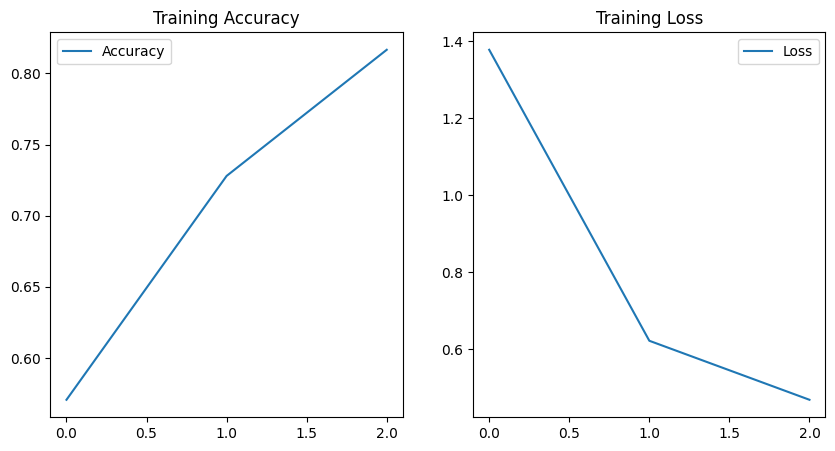

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.legend()
plt.title('Training Loss')
plt.show()


### Extracting dominant skin color from faces

In [12]:
!pip install opencv-python scikit-learn


In [13]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def get_dominant_skin_color(image_path, k=1):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load OpenCV's pre-trained Haar face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        return np.array([0, 0, 0])  # Face not detected

    (x, y, w, h) = faces[0]

    # Crop a region on cheek or forehead (example: top middle of face)
    face_region = img_rgb[y + int(0.3*h): y + int(0.6*h), x + int(0.3*w): x + int(0.7*w)]

    if face_region.size == 0:
        return np.array([0, 0, 0])

    # Reshape and filter out zero pixels (black)
    pixels = face_region.reshape((-1, 3))
    pixels = pixels[np.any(pixels != [0, 0, 0], axis=1)]

    # Apply KMeans to get dominant color
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(pixels)
    dominant_color = kmeans.cluster_centers_[0]

    return dominant_color


In [62]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load OpenCV's pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def get_skin_color_opencv(image_path, k=1):
    img = cv2.imread(image_path)
    if img is None:
        return np.array([0, 0, 0])

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        return np.array([0, 0, 0])  # fallback if no face found

    x, y, w, h = faces[0]  # Use first detected face
    roi = img_rgb[y:y+h, x:x+w]

    # Define central cheek region (left & right cheeks)
    h1, w1 = roi.shape[:2]
    cheek_left = roi[int(h1 * 0.5):int(h1 * 0.7), int(w1 * 0.1):int(w1 * 0.3)]
    cheek_right = roi[int(h1 * 0.5):int(h1 * 0.7), int(w1 * 0.7):int(w1 * 0.9)]

    skin_samples = np.concatenate([cheek_left.reshape(-1, 3), cheek_right.reshape(-1, 3)], axis=0)

    # Remove black/empty pixels if any
    skin_samples = skin_samples[np.any(skin_samples != [0, 0, 0], axis=1)]

    if len(skin_samples) == 0:
        return np.array([0, 0, 0])

    # Use KMeans to find dominant color
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(skin_samples)
    return kmeans.cluster_centers_[0]


In [14]:
image_paths = []
DATASET_PATH = "/content/drive/MyDrive/skin-tone-dataset/train"

for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

print("Total images found:", len(image_paths))


Total images found: 1500


In [63]:
# Extract dominant colors for all images
print("Extracting dominant skin colors...")
dominant_colors = []
processed_paths = [] # Keep track of paths that were successfully processed
failed_paths = [] # Keep track of paths that failed

# Wrap the loop with tqdm for a progress bar
for path in tqdm(image_paths):
    try:
        color = get_skin_color_opencv(path)
        dominant_colors.append(color)
        processed_paths.append(path)
    except Exception as e:
        # Catch any unhandled exceptions during processing and log
        print(f"\nError processing {path}: {e}")
        dominant_colors.append(np.array([0, 0, 0]))  # Append a placeholder color
        failed_paths.append(path)

Extracting dominant skin colors...


100%|██████████| 1500/1500 [00:55<00:00, 27.04it/s]


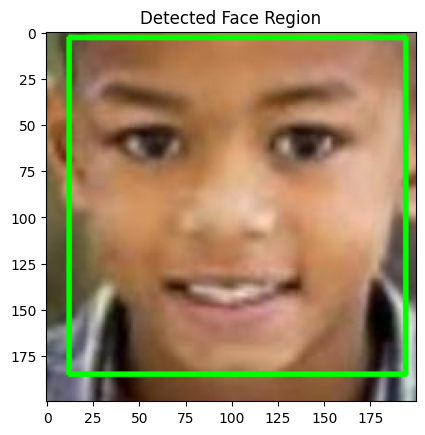

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib

img=cv2.imread("/content/drive/MyDrive/skin-tone-dataset/train/Black/10_0_1_20170104010841239.jpg.chip.jpg")
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Need grayscale for face detection

# Load OpenCV's pre-trained Haar face detector
# Make sure this cascade file exists or is loaded correctly
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)

# Check if faces were detected before trying to draw
if len(faces) > 0:
    (x, y, w, h) = faces[0] # Get the first detected face coordinates
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(img_rgb)
    plt.title("Detected Face Region")
    plt.show()
else:
    print("No face detected in the image.")


### Clustering the images based on dominant skin color into new categories.

In [64]:
# Convert to numpy array for clustering
dominant_colors = np.array(dominant_colors)
print(f"\nFinished extracting colors. Processed {len(processed_paths)} images, failed on {len(failed_paths)}.")

# It's often useful to remove the fallback colors from the clustering input
# as they represent failures rather than a valid skin tone.
# We will perform clustering only on successfully extracted colors.
valid_colors = dominant_colors[np.any(dominant_colors != [0, 0, 0], axis=1)]
valid_paths = [path for i, path in enumerate(processed_paths) if np.any(dominant_colors[i] != [0, 0, 0])]


print(f"Using {len(valid_colors)} valid color samples for clustering.")



Finished extracting colors. Processed 1500 images, failed on 0.
Using 685 valid color samples for clustering.


#### Clustering On basis of skin Color

In [65]:
from sklearn.cluster import KMeans
# Define the number of clusters (skin tone categories)
k = 6  # Choose the number of desired skin tone clusters

print(f"Performing K-Means clustering with k={k}...")
# Perform KMeans clustering on the valid dominant colors
if len(valid_colors) >= k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit and predict the cluster for each valid color
    valid_tone_clusters = kmeans.fit_predict(valid_colors)

    print("Cluster centers (RGB):")
    for i, center in enumerate(kmeans.cluster_centers_):
        print(f"  Cluster {i}: {center.astype(int)}")

    # Create a mapping from the original image paths (that had valid colors) to their cluster index
    path_to_cluster = dict(zip(valid_paths, valid_tone_clusters))

else:
    print(f"Warning: Not enough valid color samples ({len(valid_colors)}) to perform clustering with k={k}.")
    # Handle this case - perhaps stop or proceed without clustering/reorganization
    # For now, we'll print a message and skip the clustering dependent steps
    kmeans = None # Indicate clustering didn't happen
    valid_tone_clusters = []
    path_to_cluster = {}


Performing K-Means clustering with k=6...
Cluster centers (RGB):
  Cluster 0: [204 150 123]
  Cluster 1: [152  99  74]
  Cluster 2: [219 169 147]
  Cluster 3: [233 192 175]
  Cluster 4: [103  70  55]
  Cluster 5: [180 127 101]


In [66]:
# (Optional) Visualize the clusters using PCA
if kmeans is not None and len(valid_colors) > 1: # Ensure clustering happened and there's data
    print("Visualizing clusters using PCA...")
    try:
        # Convert colors to LAB for better perceptual uniformity if desired,
        # but PCA works on the space the data is in (RGB here).
        # dominant_lab = [cv2.cvtColor(np.uint8([[c]]), cv2.COLOR_RGB2LAB)[0][0] for c in valid_colors]
        # components = PCA(n_components=2).fit_transform(dominant_lab) # PCA on LAB

        # PCA on RGB colors
        components = PCA(n_components=min(2, len(valid_colors))).fit_transform(valid_colors) # Ensure n_components <= n_samples

        if components.shape[1] >= 2:
            # Map cluster indices back to the valid paths
            cluster_labels_for_plot = [path_to_cluster.get(path, -1) for path in valid_paths]
            # Filter out any paths that might not have made it into valid_paths for some reason (shouldn't happen if logic is right)
            valid_components = components[np.array(cluster_labels_for_plot) != -1]
            cluster_labels_for_plot = [label for label in cluster_labels_for_plot if label != -1]

            if len(valid_components) > 0:
                fig = px.scatter(
                    x=valid_components[:,0],
                    y=valid_components[:,1],
                    color=[str(label) for label in cluster_labels_for_plot], # Color by cluster index
                    title=f"Skin Tone Clusters ({k=}, PCA of RGB)"
                )
                fig.show()
            else:
                 print("Not enough valid data points after PCA for visualization.")
        else:
             print("Not enough components after PCA for 2D visualization.")

    except Exception as e:
        print(f"Error during PCA visualization: {e}")
else:
    print("Skipping PCA visualization.")


Visualizing clusters using PCA...


In [67]:
# Define a function to categorize clusters into readable tone names (optional)
# This is just one way; you could use the cluster index directly or derive names differently.
def categorize_skin_tone(rgb_color):
    """Simple categorization based on brightness."""
    # Ensure color is a numpy array and has 3 elements
    if not isinstance(rgb_color, np.ndarray) or rgb_color.shape != (3,):
        return "Unknown"

    # Ensure color values are within [0, 255] and are integers for brightness calculation
    rgb_color = np.clip(rgb_color, 0, 255).astype(float)

    # Perceived brightness calculation (standard formula)
    brightness = (0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2])

    # Simple thresholds - adjust as needed
    if brightness > 210: return "Pale"
    elif brightness > 180: return "Fair"
    elif brightness > 150: return "Light"
    elif brightness > 120: return "Medium"
    elif brightness > 90: return "Tan"
    elif brightness > 60: return "Deep"
    else: return "Rich"


In [34]:
for i, center in enumerate(kmeans.cluster_centers_):
    label = categorize_skin_tone(center)
    print(f"Tone_{i} → RGB {center.astype(int)} → {label}")


Tone_0 → RGB [0 0 0] → Rich
Tone_1 → RGB [208 155 129] → Light
Tone_2 → RGB [152  99  74] → Tan
Tone_3 → RGB [229 184 164] → Fair
Tone_4 → RGB [181 128 102] → Medium
Tone_5 → RGB [102  70  55] → Deep


In [68]:
# Assign a readable label to each cluster center
if kmeans is not None:
    tone_labels = [categorize_skin_tone(center) for center in kmeans.cluster_centers_]
    print("\nProposed Tone Labels for Clusters:")
    for i, center in enumerate(kmeans.cluster_centers_):
        print(f"  Cluster {i} (RGB: {center.astype(int)}) → {tone_labels[i]}")
else:
    tone_labels = []
    print("\nClustering did not occur, cannot assign tone labels.")



Proposed Tone Labels for Clusters:
  Cluster 0 (RGB: [204 150 123]) → Light
  Cluster 1 (RGB: [152  99  74]) → Tan
  Cluster 2 (RGB: [219 169 147]) → Fair
  Cluster 3 (RGB: [233 192 175]) → Fair
  Cluster 4 (RGB: [103  70  55]) → Deep
  Cluster 5 (RGB: [180 127 101]) → Medium


In [71]:
# Create new directories based on the clustering results and move/copy images
if kmeans is not None and len(valid_paths) > 0:
    output_path = "/content/drive/MyDrive/skin-tone-clustered"
    print(f"\nOrganizing images into clustered directories under {output_path}...")

    # Create the main output directory
    os.makedirs(output_path, exist_ok=True)

    # Create subdirectories for each cluster using the generated labels (or cluster index if labels are not used)
    cluster_dir_names = tone_labels if tone_labels else [f"Tone_{i}" for i in range(k)]

    for dir_name in cluster_dir_names:
        os.makedirs(os.path.join(output_path, dir_name), exist_ok=True)

    # Map the cluster index to the directory name
    cluster_idx_to_dir_name = dict(enumerate(cluster_dir_names))

    # Move/copy images to their corresponding cluster directory
    # Use valid_paths and valid_tone_clusters as they correspond to the clustering results
    print(f"Copying images to {k} clustered directories...")
    for i, img_path in enumerate(valid_paths):
        try:
            cluster_index = valid_tone_clusters[i]
            dir_name = cluster_idx_to_dir_name.get(cluster_index, "Unknown_Cluster") # Fallback
            file_name = os.path.basename(img_path)
            dest_path = os.path.join(output_path, dir_name, file_name)

            # Check if the destination directory exists (should have been created above)
            if os.path.isdir(os.path.dirname(dest_path)):
                 shutil.copy(img_path, dest_path)  # Use shutil.move if you want to move instead of copy
            else:
                 print(f"Warning: Destination directory '{os.path.dirname(dest_path)}' does not exist for image {file_name}.")

        except Exception as e:
            print(f"\nError copying image {img_path} to clustered directory: {e}")

    print("Image organization complete.")
    print(f"Check your Google Drive at '{output_path}' to see the clustered images.")

else:
     print("\nSkipping image organization into clustered folders as clustering did not occur or no valid images were processed.")
     output_path = None # Ensure output_path is None if clustering didn't happen



Organizing images into clustered directories under /content/drive/MyDrive/skin-tone-clustered...
Copying images to 6 clustered directories...
Image organization complete.
Check your Google Drive at '/content/drive/MyDrive/skin-tone-clustered' to see the clustered images.


### Training a TensorFlow model to classify images into these new clustered categories

In [73]:
# ## 4. Model Training with Clustered Data
#
# This section sets up and trains a new TensorFlow model using the images organized into the new skin tone clusters.
# Check if output_path exists and contains directories
if output_path and os.path.exists(output_path) and any(os.path.isdir(os.path.join(output_path, d)) for d in os.listdir(output_path)):

    print(f"\nLoading clustered dataset from {output_path} for model training...")

    # Define constants for training
    BATCH_SIZE = 32
    IMG_SIZE = (224, 224) # Match input size of the model
    SEED = 123

    # Load the dataset from the newly created clustered directories
    # labels="inferred" will use the directory names as labels
    # label_mode="categorical" is suitable for multi-class classification with softmax output
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        output_path,
        labels="inferred",
        label_mode="categorical",
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        shuffle=True,
        seed=SEED
    )

    # Get the class names inferred by the dataset loader
    # This order matches the order of probabilities in the model's output
    inferred_class_names = train_ds.class_names
    print(f"Inferred class names (matching directory names): {inferred_class_names}")
    num_classes = len(inferred_class_names)
    print(f"Number of classes for training: {num_classes}")

    # --- Prepare the Dataset for Training ---
    AUTOTUNE = tf.data.AUTOTUNE

    # Normalize: [0, 255] → [0, 1]
    normalization_layer = tf.keras.layers.Rescaling(1./255)

    # Apply normalization and performance optimizations
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

    print("Dataset prepared for training.")

    # --- Build the Model ---
    print("Building the model...")
    # Using Transfer Learning with MobileNetV2 for better results on smaller datasets
    # Ensure num_classes matches the number of output categories

    # Data Augmentation
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1)
    ], name="data_augmentation")

    # Base Model (Pre-trained on ImageNet)
    base_model = applications.MobileNetV2(
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
        include_top=False, # Exclude the classifier layers
        weights='imagenet' # Use pre-trained weights
    )
    base_model.trainable = False  # Freeze the base model layers initially

    # Construct the final model
    model = models.Sequential([
        layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        data_augmentation, # Apply data augmentation
        base_model,         # Add the pre-trained base model
        layers.GlobalAveragePooling2D(), # Reduce spatial dimensions
        layers.Dense(128, activation='relu'), # Add a dense layer
        layers.Dropout(0.5),              # Add dropout for regularization
        layers.Dense(num_classes, activation='softmax') # Output layer with num_classes units
    ], name="skin_tone_classifier")


    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy', # Suitable for categorical labels
        metrics=['accuracy']
    )

    model.summary()

    # --- Train the Model ---
    print("\nStarting model training...")
    EPOCHS = 2 # You can adjust the number of epochs

    # Optional: Add Early Stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='loss', # Monitor training loss
        patience=3,     # Number of epochs with no improvement after which training will be stopped.
        restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
    )

    # Fit the model to the training data
    # If you have a validation set, add validation_data=validation_ds and monitor='val_loss'
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        callbacks=[early_stopping] if 'early_stopping' in locals() else None # Add callbacks if defined
    )

    print("Model training complete.")

else:
    print("\nSkipping model training as clustered dataset path is not valid or empty.")
    train_ds = None
    model = None
    history = None
    inferred_class_names = None # Ensure this is None if model training is skipped



Loading clustered dataset from /content/drive/MyDrive/skin-tone-clustered for model training...
Found 676 files belonging to 5 classes.
Inferred class names (matching directory names): ['Deep', 'Fair', 'Light', 'Medium', 'Tan']
Number of classes for training: 5
Dataset prepared for training.
Building the model...


Model: "skin_tone_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting model training...
Epoch 1/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2739 - loss: 1.9073
Epoch 2/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3560 - loss: 1.4408
Model training complete.


### Visualizing clustering results.


Plotting training history...


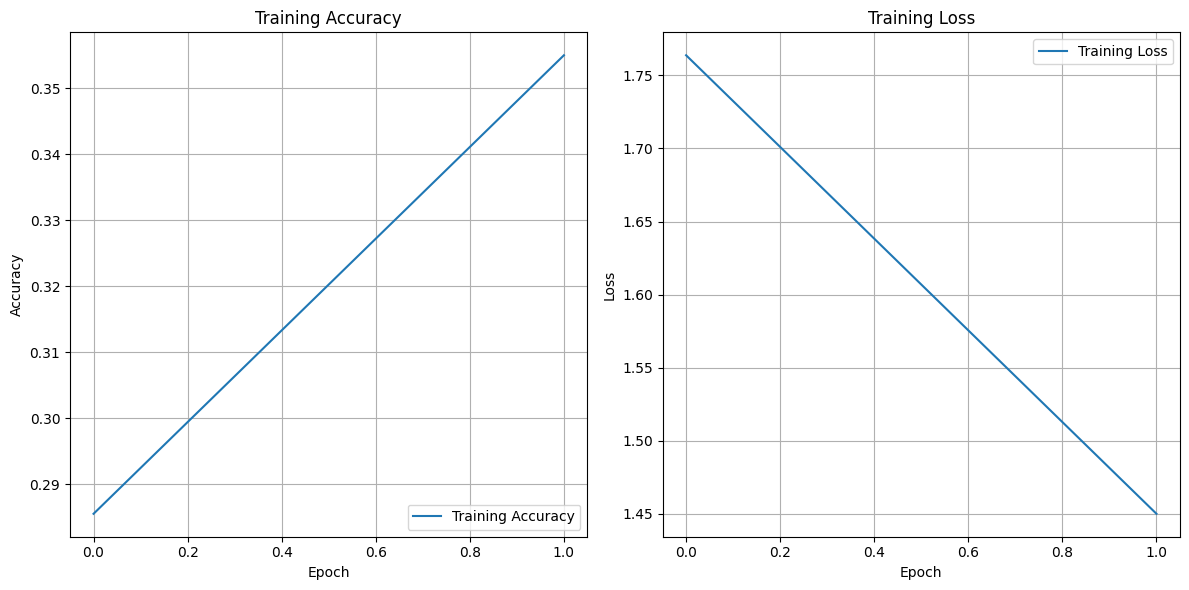

In [74]:
# ## 5. Visualize Training History
# Plot training history if training occurred
if history:
    print("\nPlotting training history...")
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping plotting as model training did not occur.")


In [49]:
from sklearn.decomposition import PCA
import plotly.express as px

# Convert colors to LAB
dominant_lab = [cv2.cvtColor(np.uint8([[c]]), cv2.COLOR_RGB2LAB)[0][0]
               for c in kmeans.cluster_centers_]

# PCA Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(dominant_colors)

fig = px.scatter(
    x=components[:,0],
    y=components[:,1],
    color=[tone_labels[i] for i in tone_clusters],
    title="Skin Tone Clusters (PCA)"
)
fig.show()

### Exporting the trained model as a TFLite file.

In [75]:
if model:
    print("\nExporting model to TFLite format...")
    try:
        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        tflite_model = converter.convert()

        tflite_file_path = 'skin_tone_classifier.tflite'
        with open(tflite_file_path, 'wb') as f:
            f.write(tflite_model)

        print(f"Model successfully exported to {tflite_file_path}")
        # Optional: Download the file if in Colab
        # files.download(tflite_file_path)

    except Exception as e:
        print(f"Error during TFLite conversion: {e}")
else:
    print("\nSkipping TFLite export as model training did not occur.")




Exporting model to TFLite format...
Saved artifact at '/tmp/tmp5x5ff1oe'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_517')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  135016415735120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415736272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415736656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415736464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415733584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415737808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415738192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415738576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415738384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135016415735696: TensorSpec(shape=(), dtype

### Creating a Gradio interface for inference

In [48]:
# ## 7. Gradio Interface for Inference
#
# Sets up a web interface using Gradio to test the trained model with new images.

!pip install gradio

In [ ]:
# Create a Gradio interface if the model was trained and class names are available
if model and inferred_class_names:
    print("\nSetting up Gradio interface...")
    import gradio as gr

    def classify_skin_tone_gradio(img):
        """
        Classifies an input image using the trained TensorFlow model.
        Designed for Gradio interface.

        Args:
            img (np.ndarray): Input image as a NumPy array (H, W, C).

        Returns:
            dict: A dictionary mapping class names to predicted probabilities.
        """
        # Preprocess the input image to match model's expected input
        # Resize to the model's input size
        img = cv2.resize(img, IMG_SIZE) # Ensure img is RGB if model expects that
        img = img.reshape((1, IMG_SIZE[0], IMG_SIZE[1], 3)).astype('float32')

        # Normalize pixel values [0, 255] -> [0, 1]
        # Check if your normalization layer was 1./255 or similar
        # The model definition includes a Rescaling layer at the start, so no explicit normalization needed here IF
        # the Gradio input is already 0-255 integers. Gradio's Image input (type="numpy") typically provides 0-255.
        # If you removed the Rescaling layer from the model, uncomment the line below:
        # img = img / 255.0


        # Get prediction probabilities from the model
        prediction = model.predict(img, verbose=0)[0] # verbose=0 to avoid printing progress

        # Map the probabilities to the class names
        # The order of prediction probabilities corresponds to the order of class_names
        return {label: float(pred) for label, pred in zip(inferred_class_names, prediction)}

    # Create the Gradio interface
    interface = gr.Interface(
        fn=classify_skin_tone_gradio,
        inputs=gr.Image(type="numpy", label="Upload or Drag Image"),
        outputs=gr.Label(num_top_classes=num_classes, label="Predicted Skin Tone"), # Show all predicted classes
        live=True, # Update predictions as image changes
        title="Skin Tone Classifier (Clustered Categories)"
    )

    print("Launching Gradio interface...")
    interface.launch(debug=True, share=True) # Set share=True to get a public link (useful in Colab)

else:
    print("\nSkipping Gradio interface setup as model training did not occur or class names are not available.")# Create a Gradio interface if the model was trained and class names are available
if model and inferred_class_names:
    print("\nSetting up Gradio interface...")
    import gradio as gr

    def classify_skin_tone_gradio(img):
        """
        Classifies an input image using the trained TensorFlow model.
        Designed for Gradio interface.

        Args:
            img (np.ndarray): Input image as a NumPy array (H, W, C).

        Returns:
            dict: A dictionary mapping class names to predicted probabilities.
        """
        # Preprocess the input image to match model's expected input
        # Resize to the model's input size
        img = cv2.resize(img, IMG_SIZE) # Ensure img is RGB if model expects that
        img = img.reshape((1, IMG_SIZE[0], IMG_SIZE[1], 3)).astype('float32')

        # Normalize pixel values [0, 255] -> [0, 1]
        # Check if your normalization layer was 1./255 or similar
        # The model definition includes a Rescaling layer at the start, so no explicit normalization needed here IF
        # the Gradio input is already 0-255 integers. Gradio's Image input (type="numpy") typically provides 0-255.
        # If you removed the Rescaling layer from the model, uncomment the line below:
        # img = img / 255.0


        # Get prediction probabilities from the model
        prediction = model.predict(img, verbose=0)[0] # verbose=0 to avoid printing progress

        # Map the probabilities to the class names
        # The order of prediction probabilities corresponds to the order of class_names
        return {label: float(pred) for label, pred in zip(inferred_class_names, prediction)}

    # Create the Gradio interface
    interface = gr.Interface(
        fn=classify_skin_tone_gradio,
        inputs=gr.Image(type="numpy", label="Upload or Drag Image"),
        outputs=gr.Label(num_top_classes=num_classes, label="Predicted Skin Tone"), # Show all predicted classes
        live=True, # Update predictions as image changes
        title="Skin Tone Classifier (Clustered Categories)"
    )

    print("Launching Gradio interface...")
    interface.launch(debug=True, share=True) # Set share=True to get a public link (useful in Colab)

else:
    print("\nSkipping Gradio interface setup as model training did not occur or class names are not available.")


Setting up Gradio interface...
Launching Gradio interface...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b0051ccad8f6e997c7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio/flagged/dataset2.csv
